In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

my_year_month_fmt = mdates.DateFormatter('%m/%y')

mpl.style.use('ggplot')

url = 'https://raw.githubusercontent.com/ngophuong/VNStock/main/excel_hpg.csv'
df = pd.read_csv(url, index_col = 0)
%matplotlib inline
df['datetime']=pd.to_datetime(df['<DTYYYYMMDD>'],format='%Y%m%d')

In [2]:
df.head()

,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>,datetime
<Ticker>,,,,,,,,,,,,,,
HPG,20210224,43.65,44.40,43.30,43.60,27282600,43.65,44.40,43.30,43.60,210000,1895300,1482100,2021-02-24
HPG,20210223,43.20,43.75,42.95,43.30,17921700,43.20,43.75,42.95,43.30,0,176800,1782600,2021-02-23
HPG,20210222,43.45,44.40,43.00,43.40,21362500,43.45,44.40,43.00,43.40,68000,1757900,4282000,2021-02-22
HPG,20210219,43.45,43.90,43.10,43.45,17007500,43.45,43.90,43.10,43.45,659024,6179900,1131000,2021-02-19
HPG,20210218,43.85,44.00,42.95,43.85,21343800,43.85,44.00,42.95,43.85,274900,474390,73500,2021-02-18


In [3]:
df_price = df[['datetime','<Close>']]
df_price = df_price.set_index('datetime')
df_price = df_price.head(300)
#df_price['<Close>'].plot(kind="line")
#plt.title('TCB Price Trend - Date')

In [4]:
df_price.head()

,<Close>
datetime,
2021-02-24,43.60
2021-02-23,43.30
2021-02-22,43.40
2021-02-19,43.45
2021-02-18,43.85


In [5]:
short_rolling = df_price.rolling(window=20).mean()

In [6]:
long_rolling = df_price.rolling(window=100).mean()
long_rolling.tail()
ema_short = df_price.ewm(span=20, adjust=False).mean()

Text(0, 0.5, 'Price in VND')

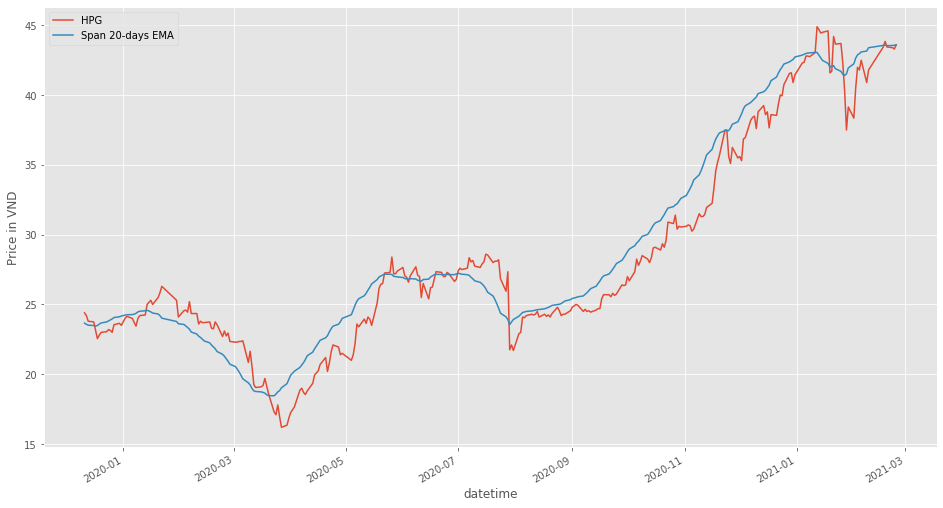

In [7]:
fig, ax = plt.subplots(figsize=(16,9))
df_price['<Close>'].plot(kind="line", label = 'HPG')
#short_rolling['<Close>'].plot(kind="line",label = '20-days SMA')
ema_short['<Close>'].plot(kind="line",label = 'Span 20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in VND')

#long_rolling['<Close>'].plot(kind="line", label = '100-days SMA')
#ax.plot(df_price.loc[start_date:end_date, :].index, df_price.loc[start_date:end_date, '<Close>'], label='Price')
#ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, '<Close>'], label = '100-days SMA')
#ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, '<Close>'], label = '20-days SMA')


In [10]:
df_vol = df[['datetime','<VolumeFB>','<VolumeFS>']]
df_vol = df[['datetime','<VolumeFB>','<VolumeFS>']].head(500)
#df_vol_buy= df_vol_buy.set_index('datetime')

In [11]:
df_vol.head()

,datetime,<VolumeFB>,<VolumeFS>
<Ticker>,,,
HPG,2021-02-24,1895300,1482100
HPG,2021-02-23,176800,1782600
HPG,2021-02-22,1757900,4282000
HPG,2021-02-19,6179900,1131000
HPG,2021-02-18,474390,73500


In [12]:
#fig, ax = plt.subplots(figsize=(15,6))

#sns.catplot(x='datetime',y='<VolumeFB>',data=df_vol_buy,kind='bar',aspect=3)

#df_vol_buy= df_vol_buy.set_index('datetime')
#df_vol_buy.plot(kind='bar',ax=ax, label = "HPG")

In [13]:
df_vol['Week_no']= df_vol['datetime'].dt.week
df_vol['Year_no']= df_vol['datetime'].dt.year
df_vol['Period'] = df_vol['Year_no'].astype(str) + str("-") + df_vol['Week_no'].astype(str)
df_vol = df_vol.groupby(by='Period').sum().reset_index()
#df_vol = df_vol.drop(['Week_no','Year_no'], axis = 1)
df_vol.head()

,Period,<VolumeFB>,<VolumeFS>,Week_no,Year_no
0,2019-1,2168850,892660,2,4038
1,2019-10,4932950,2244230,50,10095
2,2019-11,4212370,10016860,55,10095
3,2019-12,11497570,6019690,60,10095
4,2019-13,6759740,4671010,65,10095


In [14]:
df_vol = df_vol.drop(['Week_no','Year_no'],axis =1)
df_vol.head()
#sns.catplot(x='period',y='<VolumeFB>',data=df_vol_buy,kind='bar',aspect=3)

,Period,<VolumeFB>,<VolumeFS>
0,2019-1,2168850,892660
1,2019-10,4932950,2244230
2,2019-11,4212370,10016860
3,2019-12,11497570,6019690
4,2019-13,6759740,4671010


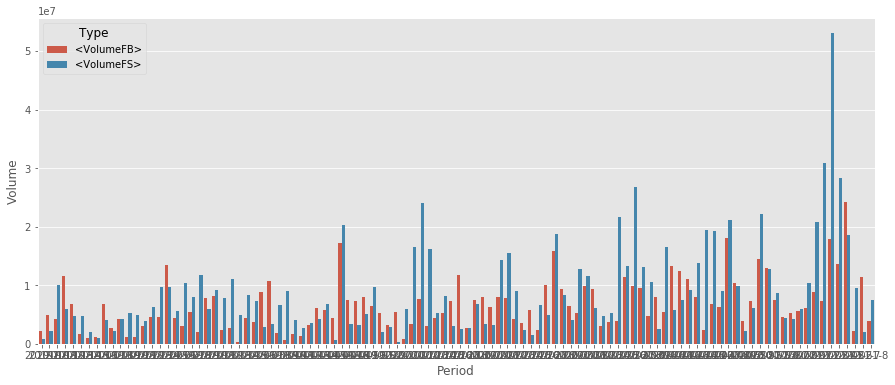

In [18]:
df_vol_unpivot = df_vol.melt(id_vars=['Period'], var_name='Type', value_name='Volume')
df_vol_unpivot.head(10)
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.barplot(x = 'Period', y = 'Volume', hue = 'Type', data = df_vol_unpivot)
